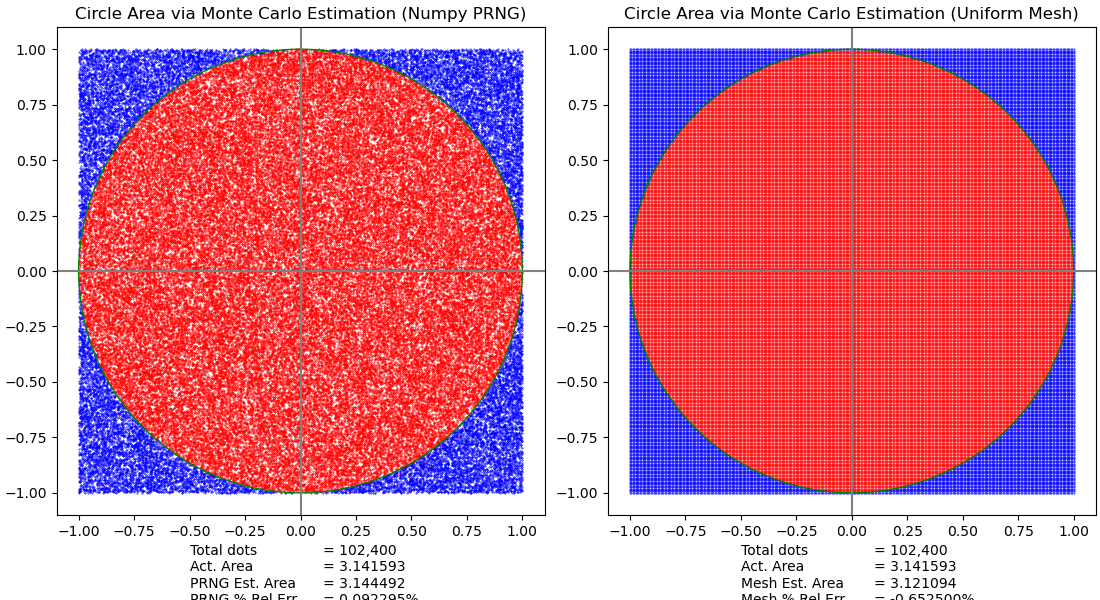

In [1]:
# mc_circle_prng.ipynb

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
from numpy.random import default_rng

iterations_sqrt = 320
iterations = iterations_sqrt**2


def plot_prng(ax):
    rng = default_rng(seed=2020)
    x = rng.random(iterations) * 2 - 1
    y = rng.random(iterations) * 2 - 1

    d = x**2 + y**2

    x_in = x[d <= 1.0]
    y_in = y[d <= 1.0]
    x_out = x[d > 1.0]
    y_out = y[d > 1.0]

    pixel_size = (72 / ax.figure.dpi) ** 2
    ax.scatter(x_in, y_in, color="red", marker=".", s=pixel_size)
    ax.scatter(x_out, y_out, color="blue", marker=".", s=pixel_size)

    ax.add_patch(Circle((0, 0), radius=1.0, color="green", fill=False))

    est_area = np.count_nonzero(d <= 1.0) / iterations * 4
    act_area = np.pi
    err = (est_area - act_area) / act_area

    ax.set_title("Circle Area via Monte Carlo Estimation (Numpy PRNG)")
    ax.set_xlim((-1.1, 1.1))
    ax.set_ylim((-1.1, 1.1))
    ax.axhline(0, color="gray")
    ax.axvline(0, color="gray")
    ax.set_aspect("equal")

    ax.text(
        -0.50,
        -1.5,
        "Total dots\nAct. Area\n" "PRNG Est. Area\nPRNG % Rel Err",
        ha="left",
    )

    ax.text(
        0.10,
        -1.5,
        f"= {iterations:,}\n= {act_area:.6f}\n" f"= {est_area:.6f}\n= {err:.6%}",
        ha="left",
    )


def plot_mesh(ax):
    # Use an equally spaced mesh
    x = np.linspace(0, 1, iterations_sqrt, dtype=np.float64) * 2 - 1
    y = np.linspace(0, 1, iterations_sqrt, dtype=np.float64) * 2 - 1
    xv, yv = np.meshgrid(x, y)
    x = xv.flatten()
    y = yv.flatten()

    # Calculate distance from origin for each (x,y) point
    d = x**2 + y**2

    # Select the points inside the circle
    x_in = x[d <= 1.0]
    y_in = y[d <= 1.0]

    # Select the points outside the circle
    x_out = x[d > 1.0]
    y_out = y[d > 1.0]

    pixel_size = (72 / ax.figure.dpi) ** 2
    ax.scatter(x_in, y_in, color="red", marker=".", s=pixel_size)
    ax.scatter(x_out, y_out, color="blue", marker=".", s=pixel_size)

    ax.add_patch(Circle((0, 0), radius=1.0, color="green", fill=False))

    est_area = np.count_nonzero(d <= 1.0) / iterations * 4
    act_area = np.pi
    err = (est_area - act_area) / act_area

    ax.set_title("Circle Area via Monte Carlo Estimation (Uniform Mesh)")
    ax.set_xlim((-1.1, 1.1))
    ax.set_ylim((-1.1, 1.1))
    ax.axhline(0, color="gray")
    ax.axvline(0, color="gray")
    ax.set_aspect("equal")

    ax.text(
        -0.50,
        -1.5,
        "Total dots\nAct. Area\n" "Mesh Est. Area\nMesh % Rel Err",
        ha="left",
    )

    ax.text(
        0.10,
        -1.5,
        f"= {iterations:,}\n= {act_area:.6f}\n" f"= {est_area:.6f}\n= {err:.6%}",
        ha="left",
    )


def main():
    plt.close("all")
    fig = plt.figure(label=" ", constrained_layout=True)
    fig.set_size_inches(11, 6)
    gs = fig.add_gridspec(1, 2)

    ax = fig.add_subplot(gs[0, 0])
    plot_prng(ax)

    ax = fig.add_subplot(gs[0, 1])
    plot_mesh(ax)

    plt.show()


main()